This is an exercise on the impact of promotional events on Rossmann store sales.  Using a one-way ANOVA, it is determined that promotional events have an impact on store sales. 

Store Types 'a' and 'd' are the most numerous and account for more than 80% of total sales; Store Type 'b', while relatively few in number, plug an important market place gap - cater to Sunday shoppers.  Germany-based Rossmann operates in Europe where Sunday store operating hours are regulated and stores are mostly closed on Sundays.  It's not surprising that Sundays account for the highest sales at Store Type 'b', while for other store types, Mondays represent the highest sales day of the week.  Store Type 'b' customers tend to have the smallest average purchase basket relative to those at the other store types.  But customer volume is highest for Store Type 'b' as it operates 7 days a week.

Promotional events tend to have the biggest impact on Mondays for stores that have them.  These are weekly events that start on Monday and end on Friday.  Advertising for the following event likely starts during the weekend.  It is imperative for stores with promotions to ensure the promoted items that are part of their merchandise allocation are stocked and displayed by Monday to avoid customer dissatisfaction.

The spending behaviour of customers at Store Type 'b' is the least sensitive of all store types to promotional events.  In fact, Store Type 'b' customers are more likely to visit the store for specific promoted items and leave without buying anything else if those items weren't available.  Store Type 'a' customers show a similar tendency but most will still increase their purchase basket during a promotion.  Customers at Store Type 'c' and 'd' seem more responsive to promotions.

Knowing this, it is best not to have "door buster deals" (loss leaders) that are part of the Store Type 'b' with 'b' merchandise allocation line-up.  These will have a more desired impact at the other store types.  Impulse buy items likely will increase average spending at Store Type 'c' and 'd' much more than at Store Type 'b', where shelf space might be better used for staples and "emergency" items.

 

In [1]:
#Get tools
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import f_oneway
import sklearn
import datetime

In [2]:
#Get data
store_df=pd.read_csv('../input/store.csv')
train_df=pd.read_csv('../input/train.csv',parse_dates=True,low_memory=False,index_col='Date')

In [3]:
#Allow for data extraction
train_df['Year']=train_df.index.year
train_df['Month']=train_df.index.month
train_df['Week']=train_df.index.week
train_df['Day']=train_df.index.weekday_name

#Sales per customer helps retailers monitor
#the average purchase basket
train_df['SalesperCustomer']=train_df['Sales']/train_df['Customers']

#Concatenate store data with training data
#for extra information on stores
train_store=pd.merge(train_df,store_df,how='inner',on='Store')

train_store.head()



,Store,DayOfWeek,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,Year,Month,...,SalesperCustomer,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,5263,555,1,1,0,1,2015,7,...,9.482883,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,1,4,5020,546,1,1,0,1,2015,7,...,9.194139,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
2,1,3,4782,523,1,1,0,1,2015,7,...,9.143403,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
3,1,2,5011,560,1,1,0,1,2015,7,...,8.948214,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
4,1,1,6102,612,1,1,0,1,2015,7,...,9.970588,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN


In [4]:
#There are 4 store types and 3 merchandise
#assortment types: a - basic; b - extra;
#c - extended.  They are distributed as
#follows.
store_df.groupby(['StoreType','Assortment']).Assortment.count()

StoreType  Assortment
a          a             381
           c             221
b          a               7
           b               9
           c               1
c          a              77
           c              71
d          a             128
           c             220
Name: Assortment, dtype: int64

Rossmann operates mostly in Germany where stores are typically closed on Sundays.  
Of all the four store types, only Store Type 'b' opens on Sundays.

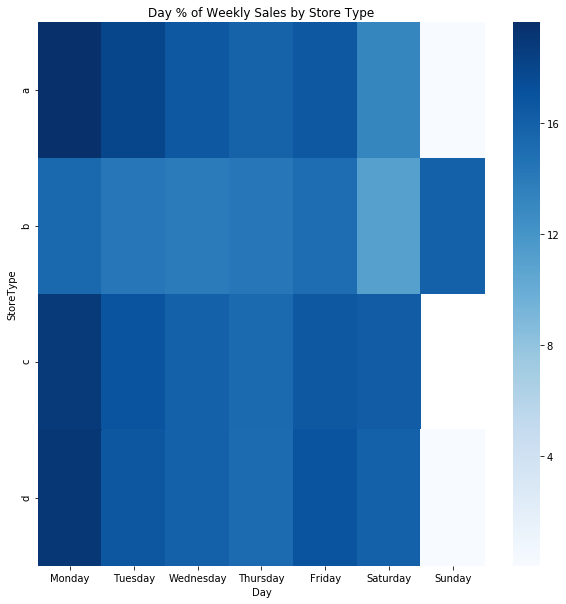

In [5]:
store_open=train_store[(train_store.Open==1)]

saledaystype=store_open.groupby(['StoreType','Day']).sum()['Sales'].groupby(level=0).apply(lambda x:100*x/x.sum()).unstack().loc[:,[
    'Monday',
    'Tuesday',
    'Wednesday',
    'Thursday',
    'Friday',
    'Saturday',
    'Sunday']]

plt.figure(figsize=(10,10))

sns.heatmap(saledaystype,cmap='Blues').set_title('Day % of Weekly Sales by Store Type')
plt.show()

Overall, promotional events provide lift to both customer and 
sales volume.  The impact is most noticeable during the month
of December which is when consumers shop for Christmas and New Year.  
Promotional events provide a lift of less than 1.50€ on the average 
purchase basket of each customer for most months except December.

Text(0.5, 1.0, 'Promotional Impact on Sales Volume')

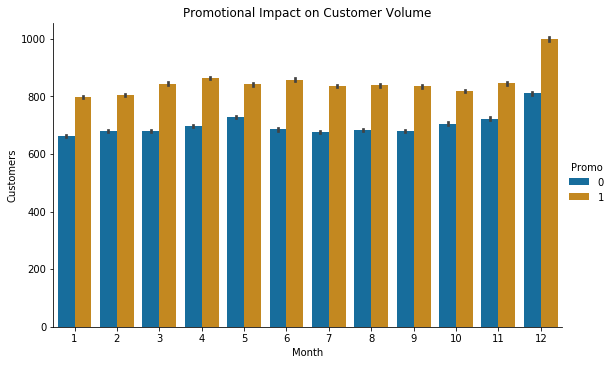

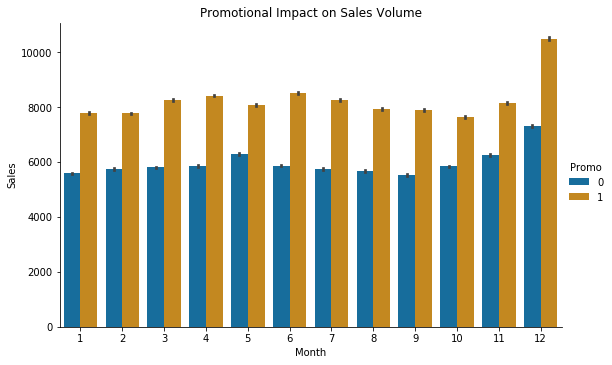

In [6]:
sns.catplot(data=store_open,x='Month',y='Customers',palette='colorblind',hue='Promo',kind='bar',height=5,
           aspect=8/5)
plt.title('Promotional Impact on Customer Volume')

sns.catplot(data=store_open, x='Month',y='Sales',palette='colorblind',hue='Promo',kind='bar',height=5,
           aspect=8/5)

plt.title('Promotional Impact on Sales Volume')


Compared to other store types, customer behaviour at 
Store Type 'b' is the least sensitive to promotional 
events.

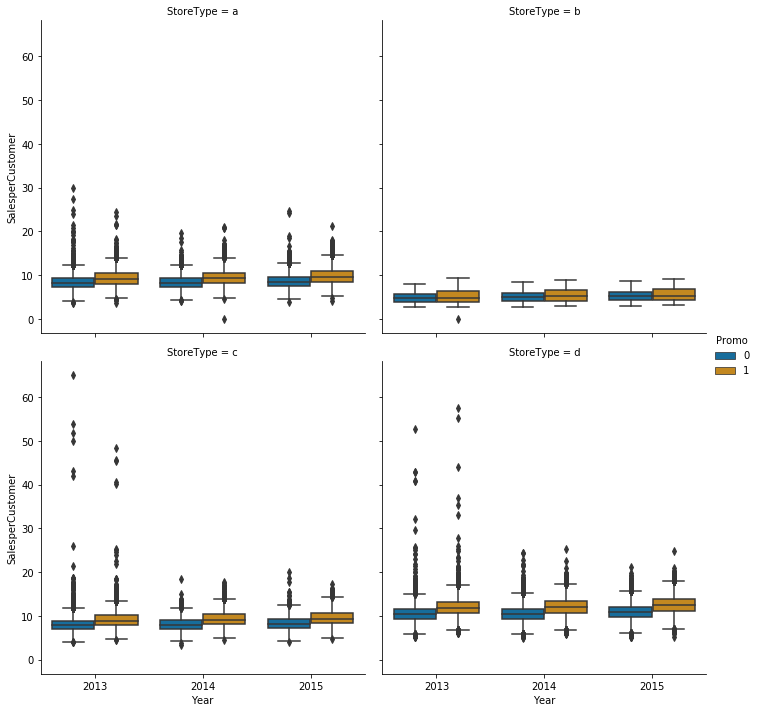

In [7]:
sns.catplot(data=store_open,x='Year',y='SalesperCustomer',col='StoreType',col_order=['a','b','c','d'],
            hue='Promo',palette='colorblind',col_wrap=2, kind='box')

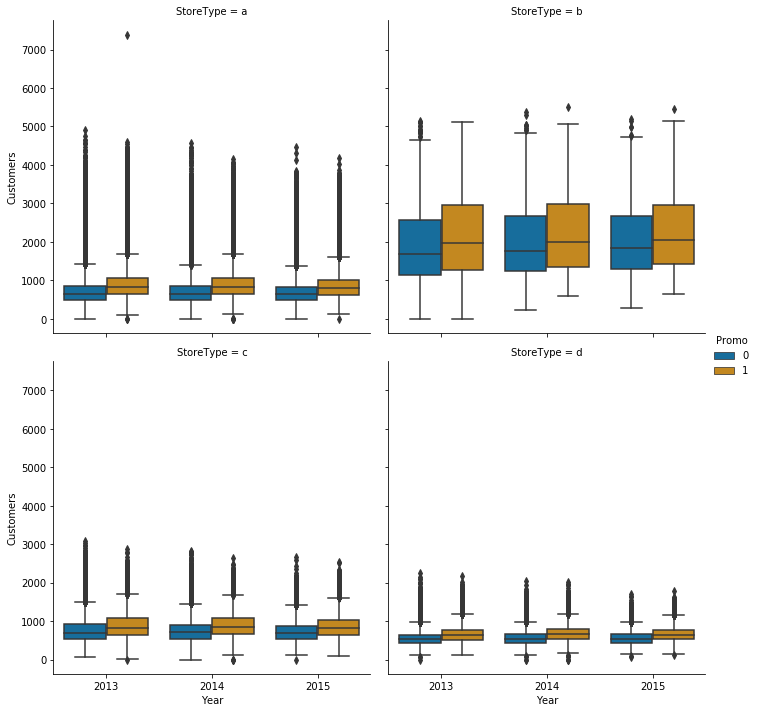

In [8]:
sns.catplot(data=store_open,x='Year',y='Customers',col='StoreType',col_order=['a','b','c','d'],
            hue='Promo',palette='colorblind',col_wrap=2,kind='box')

Customer base at Store Type 'b' with merchandise allocation 
'b' are more likely to visit the stores just for specific promotional 
items and leave without buying anything else if those items weren't 
available. For the majority of its customer base, promotional events 
provide negligible lift to the average spending per person.

Some customers at Store Type 'a' with merchandise allocation 'a' 
exhibit similar tendency, ie target only specific promotional items. But 
overall, most will still increase the size of their purchase basket during 
a promotional event.

Customers at Store Type 'c' and 'd' are more sensitive to promotional events.

In [9]:
store_open.groupby(['StoreType','Promo','Assortment']).SalesperCustomer.describe()


count       mean       std       min  \
StoreType Promo Assortment                                            
a         0     a           157775.0   8.245818  1.465991  3.635389   
                c            94757.0   8.545174  1.533253  4.151235   
          1     a           128254.0   9.355252  1.694059  0.000000   
                c            76257.0   9.606742  1.752278  4.132372   
b         0     a             3963.0   6.004593  0.736876  3.801695   
                b             5077.0   4.168919  0.674202  2.749075   
                c              582.0   5.568012  0.439001  4.289030   
          1     a             2446.0   6.733681  0.780860  4.143487   
                b             3133.0   4.153980  0.550337  0.000000   
                c              360.0   6.079790  0.374720  4.993193   
c         0     a            32268.0   7.739291  1.289794  3.382542   
                c            29967.0   8.489280  1.565809  4.095064   
          1     a            26286.0   8.894304  1.498498  4.448854   
                c            24447.0   9.676534  1.846214  4.686770   
d         0     a            51961.0  10.330576  1.593431  5.583333   
                c            91113.0  10.753989  1.801801  4.881279   
          1     a            41923.0  11.942236  1.838369  6.419786   
                c            73771.0  12.214557  2.020652  5.191489   

                                  25%        50%        75%        max  
StoreType Promo Assortment                                              
a         0     a            7.184426   8.062185   9.121190  29.877551  
                c            7.392801   8.388406   9.570332  24.143521  
          1     a            8.095807   9.141828  10.386396  24.352234  
                c            8.307203   9.445633  10.778080  18.067485  
b         0     a            5.458164   5.962480   6.556883   8.642473  
                b            3.681765   4.061713   4.555769   7.367793  
                c            5.298290   5.521871   5.806864   7.206720  
          1     a            6.152392   6.715897   7.288416   9.203528  
                b            3.776053   4.102865   4.494137   6.942342  
                c            5.812964   6.075476   6.299934   7.722051  
c         0     a            6.832583   7.588140   8.503000  19.916784  
                c            7.376110   8.354905   9.473299  64.957854  
          1     a            7.859049   8.738441   9.793758  21.919866  
                c            8.334942   9.514388  10.906227  48.381148  
d         0     a            9.297175  10.325250  11.389610  52.734737  
                c            9.448370  10.702128  11.930348  24.292722  
          1     a           10.759235  11.959459  13.152529  57.614983  
                c           10.783823  12.180952  13.572871  25.358779

In [10]:
#Rossmann store promotions seem like
#weekly events that run from Monday
#through Friday.

store_open.groupby(['Day','Promo']).Promo.count()

Day        Promo
Friday     0         66485
           1         72155
Monday     0         60317
           1         77243
Saturday   0        144058
Sunday     0          3593
Thursday   0         60521
           1         74123
Tuesday    0         66843
           1         77118
Wednesday  0         65679
           1         76257
Name: Promo, dtype: int64

For stores that participate in promotional events, Mondays 
show the biggest increase in average spending behaviour as 
well as customer volume. This is likely because 
a) there are no such events over the weekends; 
b) most stores are closed on Sundays; and/or 
c) advertising for events started over the weekends.


Text(0.5, 1.0, 'Promotional Impact on Average Spending Behaviour by Day')

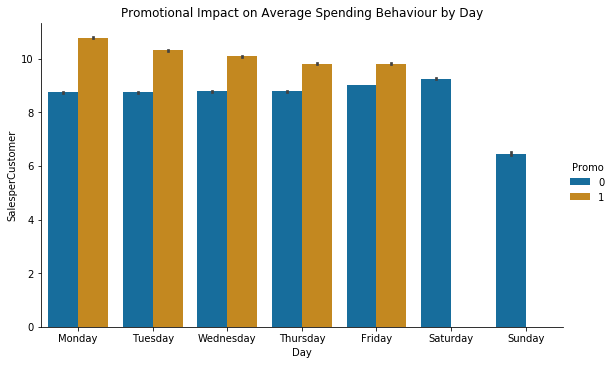

In [11]:
#For stores that participate in promotional events,
#promotional impact by day of week.

sns.catplot(data=store_open,x='Day',y='SalesperCustomer',hue='Promo',kind='bar',
           height=5,aspect=8/5,palette='colorblind',order=['Monday','Tuesday','Wednesday',
                                                          'Thursday','Friday','Saturday',
                                                          'Sunday'])
plt.title('Promotional Impact on Average Spending Behaviour by Day')

Text(0.5, 1.0, 'Promotional Impact on Customer Volume by Day')

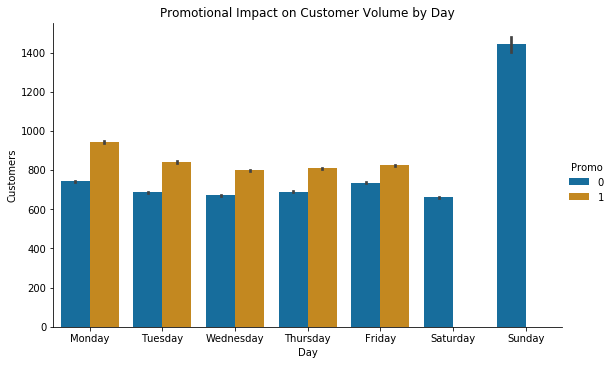

In [12]:
sns.catplot(data=store_open,x='Day',y='Customers',hue='Promo',kind='bar',
           height=5,aspect=8/5,palette='colorblind',order=['Monday','Tuesday',
                                                           'Wednesday','Thursday',
                                                          'Friday','Saturday',
                                                          'Sunday'])
plt.title('Promotional Impact on Customer Volume by Day')

The weeks leading up to Christmas are very important for 
retailers. Even though promotions have little impact 
on the average individual spending at Store Type 'b', they still
provide overall sales lift. Consumers today have come to expect 
promotions during the weeks before Christmas. Stores with promotions
attract higher customer volume than those without.

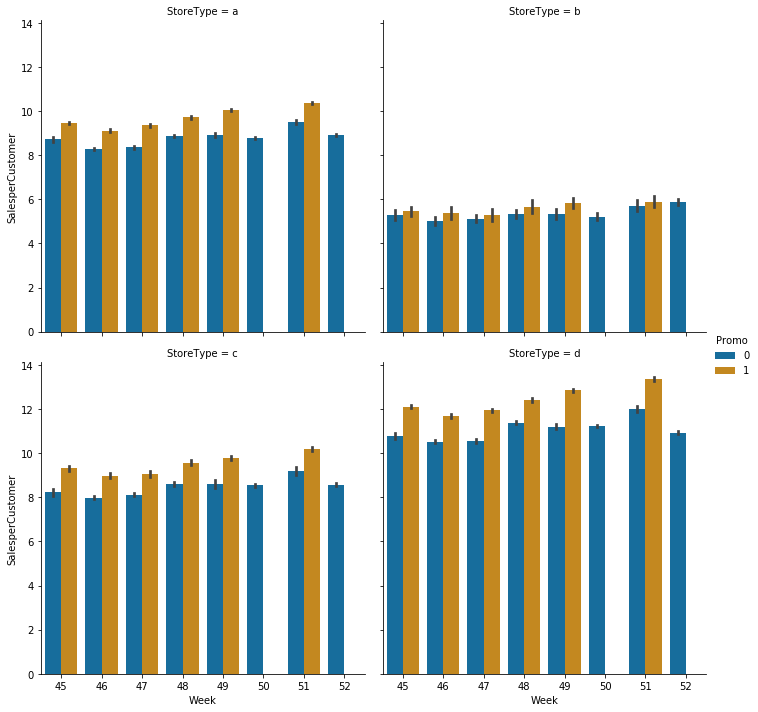

In [13]:
df=store_open[(store_open.Week>44)]
sns.catplot(data=df,x='Week',y='SalesperCustomer',col='StoreType',col_order=['a','b','c','d'],
            hue='Promo',color='StateHoliday',palette='colorblind', col_wrap=2,kind='bar')
          

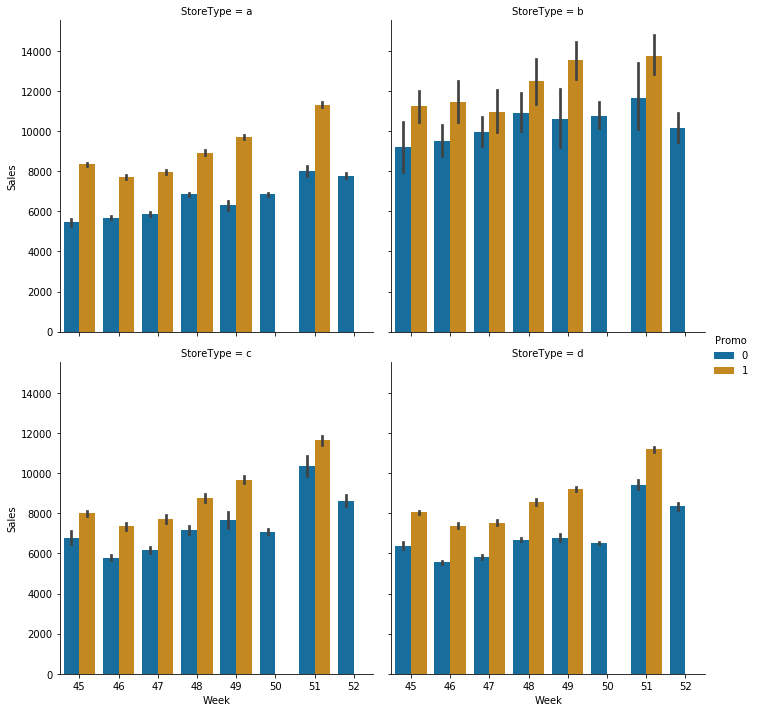

In [14]:
sns.catplot(data=df,x='Week',y='Sales',col='StoreType',col_order=['a','b','c','d'],
            hue='Promo',color='StateHoliday',palette='colorblind',col_wrap=2, kind='bar')

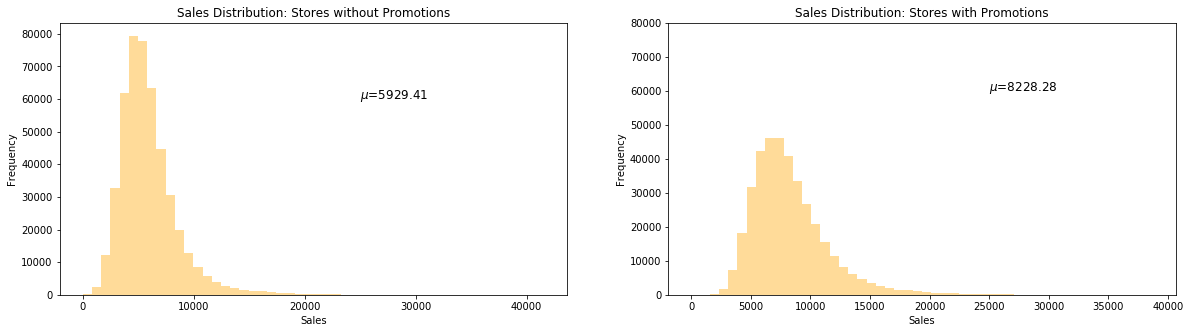

In [15]:
#It appears that promotions do provide a lift to 
#sales.  Let's test to see if this is really the
#case and not due to chance market fluctuation.

df_promo=store_open[(store_open.Promo==1)]
df_nopromo=store_open[(store_open.Promo==0)]

#Look at the distribution of sales
f,axes=plt.subplots(ncols=2,figsize=(20,5))

sns.distplot(df_nopromo['Sales'],kde=False, color='orange',ax=axes[0])
axes[0].set_ylabel('Frequency')
axes[0].text(25000, 60000, r'$\mu$='+str(round(df_nopromo['Sales'].mean(),2)), 
         fontsize=12)
axes[0].set_title('Sales Distribution: Stores without Promotions')

sns.distplot(df_promo['Sales'],kde=False, color='orange',ax=axes[1])
axes[1].set_ylabel('Frequency')
axes[1].set_ylim([0,80000])
axes[1].text(25000,60000,r'$\mu$='+str(round(df_promo['Sales'].mean(),2)),
             fontsize=12)
axes[1].set_title('Sales Distribution: Stores with Promotions')
plt.show()

In [16]:
df_nopromo.Sales.describe()

count    467496.000000
mean       5929.407603
std        2629.648385
min           0.000000
25%        4242.000000
50%        5459.000000
75%        7004.000000
max       41551.000000
Name: Sales, dtype: float64

In [17]:
df_promo.Sales.describe()

count    376896.000000
mean       8228.281239
std        3175.759157
min           0.000000
25%        6069.000000
50%        7649.000000
75%        9686.000000
max       38722.000000
Name: Sales, dtype: float64

In [18]:
#Sales are not normally distributed but
#sample size is large.  Consider one-way ANOVA as it
#is a fairly robust test against normality
#assumption.
#H0: Means are equal (Promotions have no effect)
#H1: Means are not equal (Promotions have effect)

stat,p = f_oneway(df_nopromo.Sales,df_promo.Sales)
print('Statistic= %.3f, p= %.3f'%(stat,p))

#Interpret
alpha=0.05
if p>alpha:
    print('Cannot reject H0, i.e. means are not significantly different')
else:
    print('Reject H0, i.e. means are different.')

Statistic= 132382.948, p= 0.000
Reject H0, i.e. means are different.
